### Ток $K_{Low}$

исследование, поиск тау в соответсвии с гипотезой: итог: 2 ворот, 3 состояния

по статье A Delayed Rectifier Conductance in Type I Hair Cells of the Mouse Utricle (DOI: 10.1152/jn.1996.76.2.995)

только для клеток I типа

$I(t)=I_{\infty}-\frac{\left(I_{\infty}-I_0\right)}{\left(\tau_1-\tau_2\right)}\left(\tau_1 e^{-t / \tau_1}-\tau_2 e^{-t / \tau_2}\right)$

$Q_{10}=A\left(25^{\circ} \mathrm{C}\right) \times 10 / A\left(36^{\circ} \mathrm{C}\right) \times \Delta T$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import lambertw
from scipy.optimize import curve_fit

In [30]:
# ток определеняеися в статье следующим образом
def IKLow1996(V_, Ist_, I0_, V12_, t_, T):
    if T<26:
        k_tau=41
        tau1=(3.12 * np.exp(-(V_-V12_) / k_tau)+0.32)
        tau2=(23.6 * np.exp(-(V_-V12_) / k_tau)+6.9)
    else:
        k_tau=41
        tau1=(5.16 * np.exp(-(V_-V12_) / k_tau)+0.37)
        tau2=(24.8 * np.exp(-(V_-V12_) / k_tau)+8.9)
    return Ist_-(Ist_-I0_)/(tau1-tau2)*(tau1*np.exp(-t_/tau1)-tau2*np.exp(-t_/tau2))

## температура 23-25$^{\circ}C$

$g_{max}=75 \pm 65 \mathrm{nS}$ at $-54 \mathrm{mV}$

### Траектории токов по аппроксимациям из статьи

$\tau_i$ не соотвествут нашему моделированию 

In [3]:
t=np.arange(0, 200, 5)

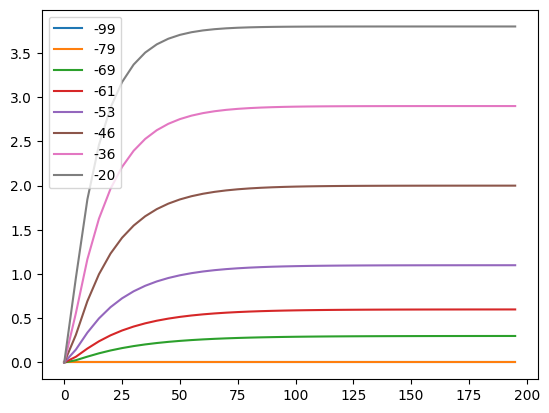

In [4]:
s=5.4
gmax=75 # nS
EK=81.7 #\pm 3 mV
V_I_max_K_Low=[-99, -79, -69, -61, -53, -46, -36, -20] # -79 -> -67.85714285714286
I_max_K_Low  = [0,      0, 0.3, 0.6, 1.1,   2, 2.9, 3.8]
T0=23
T=23
V12=-74+(T-T0)*0.8 #V12=-67 #(-88 – -62)
I0=0
for i, V in enumerate(V_I_max_K_Low):
    I=IKLow1996(V, I_max_K_Low[i], I0, V12, t, T)
    plt.plot(t, I, label=str(V))
plt.legend()

### поиск новых постоянных времени
(исходя из конструкции математического описания: $\tau_2=2 \tau_1$)

In [5]:
# Определение функции для аппроксимации
def I_double_exp(t,  C1, C2, tau):
    return C1 * np.exp(-t / tau) + C2 * np.exp(- t / (2 * tau))

In [49]:
#V_I_max_K_Low=[-99, -79, -69, -61, -53, -46, -36, -20] # -79 -> -67.85714285714286
#I_max_K_Low  = [0,      0, 0.3, 0.6, 1.1,   2, 2.9, 3.8]

t_raw= np.array([0,  20,  25,  50,  60,  75, 100, 110,120])
I_69=[0, 0.5, 0.1, 0.3, 0.4, 0.5, 0.6, 0.6,0.6] # V=-69 Оцененные параметры (C1, C2, tau): [ 0.03446108 -0.59515461 22.29571298]
I_61=[0,0.45, 0.5, 0.9, 1.2, 1.3, 1.4, 1.4,1.4] # V=-61 Оцененные параметры (C1, C2, tau): [ 1.4744735  -2.86963161 12.75095376]
I_53=[0, 1.1, 1.3, 2.1, 2.6, 2.4, 2.6, 2.6,2.6] # V=-53 Оцененные параметры (C1, C2, tau): [ 2.76933042 -5.36769798  9.56627526]
I_45=[0, 2, 2.5, 3.7, 3.8,   4,   4,   4,  4]   # V=-45 Оцененные параметры (C1, C2, tau): [ 4.93889553 -8.93885893  7.45838437]
# I(V=-36) [ 0.77317409 -4.57058405  7.8714297 ]
# I(V=-30) [ 0.69504356 -4.49368536  7.30488542]
# I(V=-20) [ 0.59732185 -4.39685677  6.49838176]
# I(V=-80)[ 0.11259795 -0.30571348 13.34501086]
I_36_max=4
I_30_max=4
I_20_max=4
I_80_max=0.2
I_90_max=0.005
# для формирования данных по формалам статьи
maxI=I_20_max
V=-36
I=IKLow1996(V, maxI, I0, V12, t_raw, T)
#tau_K_Low_exp=np.array([13.34501086, 22.29571298, 12.75095376, 9.56627526, 7.45838437, 8.72415482, 8.07433331, 7.13004562])

#### для расчета экспериментальных $\tau$

Оцененные параметры (C1, C2, tau, sigma): [ 4.93889553 -8.93885893  7.45838437] 0.2712147514601261


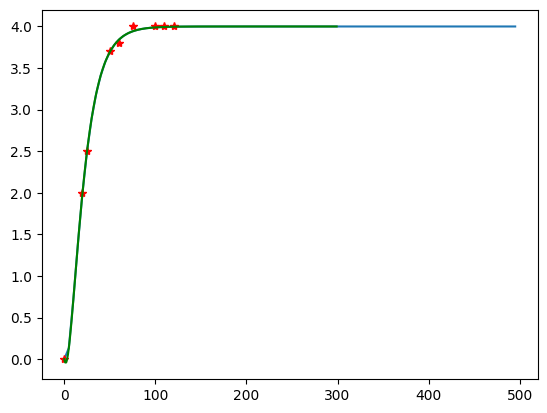

In [17]:
Inew=I_45
Imax=np.max(Inew)
popt, pcov = curve_fit(I_double_exp, t_raw, Inew-Imax, p0=np.array([10,-10, 10]))
print("Оцененные параметры (C1, C2, tau, sigma):", popt, np.sqrt(pcov[2][2]))
# проверка результата
c1, c2, tau =popt[0], popt[1],popt[2]
plt.plot(t,[I_double_exp(ti ,c1, c2, tau)+Imax for ti in t])
plt.plot(t_raw,Inew, 'r*')
t_mass=np.arange(0,300,1)
plt.plot(t_mass,[I_double_exp(ti ,c1, c2, tau)+Imax for ti in t_mass], 'g')

## Итоговые параметры

In [20]:
# равновестный потенциал
E_K=-71 
# максимальная проводимость при температуре 23 градуса С
gmax=75 # nS
g=gmax
# значения потенциалов (тестовых)
V_K_Low_exp=np.array([-80,-69, -61, -53, -45, -36, -30, -20])
# максимальные значения токов
I_K_low_exp=np.array([I_80_max ,np.max(I_69), np.max(I_61), np.max(I_53), np.max(I_45), I_36_max, I_30_max, I_20_max])

T=23
T0=23
#V12=-74 # соответсвие max tau
V12=-74+(T-T0)*0.8 #V12=-67 #(-88 – -62)

# вероятность в соответсвии с гипотезой 2х ворот
m_K_Low_exp=np.sqrt(np.abs(1/(1+np.exp((V12-V_K_Low_exp)/s))))
print('m_K_Low_exp=',m_K_Low_exp)
## Для контроля данных
#V_lit=np.arange(-140, 0,1)
#plt.plot(V_I_fin, m_exp, '*')
#plt.plot(V_lit, m_lit, 'r')

# меньшая постоянная времени
tau_K_Low_exp=np.array([13.34501086, 22.29571298, 12.75095376, 9.56627526, 7.45838437, 8.72415482, 8.07433331, 7.13004562])

#plt.figure(1)
#plt.plot(V_K_Low_exp, tau_K_Low_exp, 'r*')
#plt.figure(2)
#plt.plot(V_K_Low_exp, m_K_Low_exp, 'b*')

m_K_Low_exp= [0.49765832 0.84631437 0.957805   0.98992043 0.99768188 0.99956093
 0.9998554  0.9999773 ]


## температура 33-36$^{\circ}C$

$g_{max}=117 \mathrm{nS}$ 

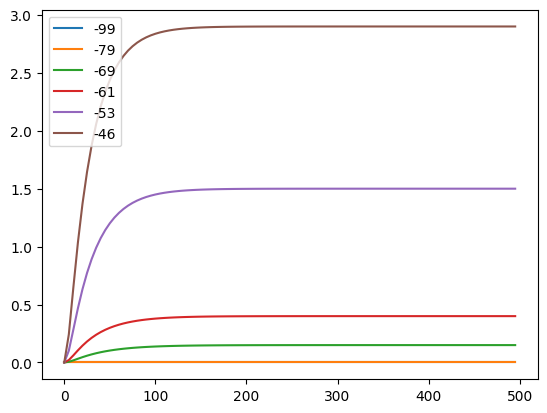

In [59]:
EK=79.9 #\pm 3 mV
gmax=117 # nS
V_Imax_mass=[-99,      -79, -69, -61, -53, -46]
Imax_mass = [0,     0,0.15, 0.4, 1.5, 2.9, 4.8]
T0=23
T=36
V12=-74+(T-T0)*0.8
t=np.arange(0, 500, 5)
I0=0
for i, V in enumerate(V_Imax_mass):
    I=IKLow1996(V, Imax_mass[i], I0, V12, t, T)
    plt.plot(t, I, label=str(V))
plt.legend()

In [60]:
#V_Imax_mass=[-99,      -79, -69, -61, -53, -46]
#Imax_mass = [0,     0,0.15, 0.4, 1.5, 2.9, 4.8]

t_raw= np.array([0,  10,  20, 25,  30,  50,  100, 110])
I_69=[0, 0.1, 0.15, 0.19, 0.21, 0.3, 0.4, 0.4] # V=-69  (C1, C2, tau, sigma): [ 0.18379407 -0.57830564 14.3938288 ] 1.9438771606890766
I_61=[0, 0.4, 0.8,     1, 1.3, 1.35, 1.5, 1.5] # V=-61 (C1, C2, tau, sigma): [-2.02010962  0.46570267 26.3377299 ] 7.278937376922403
I_53=[0, 1.3, 2.3, 2.5, 2.6, 2.8, 2.9, 2.9] # V=-53 (C1, C2, tau, sigma): [-3.56521738  0.6273384  16.11779519] 2.7611004590891115
I_45=[0, 3, 4.4, 4.5, 4.6, 4.8, 4.8,   4.8]   # V=-45 [-5.74538332  0.93159324 10.96745138] 1.1532900483416615
# I(V=-36) [ 1.57065269 -5.55296757  9.9026012 ] 0.11470174600227555
# I(V=-20) [ 2.2431344  -7.23505867  7.77559511] 0.12034002301526965
# I(V=-80) (C1, C2, tau, sigma): [ 4.53410775e-03 -8.96374901e-03  1.40590281e+01] 0.8696827185399074
I_36_max=3.5
I_20_max=5
I_80_max=0.005 #
# для формирования данных по формалам статьи
maxI=I_20_max
V=-20
I=IKLow1996(V, maxI, I0, V12, t_raw, T)
#tau_K_Low_exp=np.array([14.0590281, 14.3938288, 26.3377299, 16.11779519, 10.96745138 ,9.9026012,  7.77559511])

Оцененные параметры (C1, C2, tau, sigma): [ 0.18378674 -0.57829859 14.39398118] 1.9437650954465873


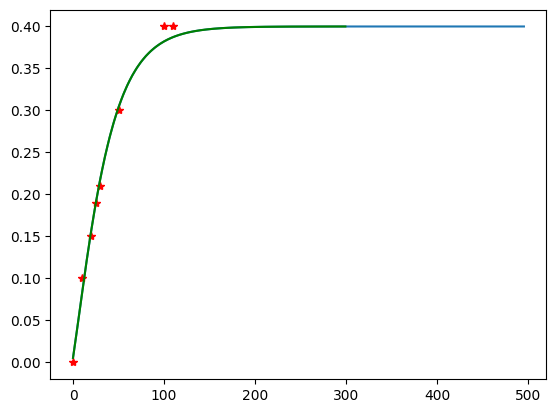

In [75]:
Inew=I_69
Imax=np.max(Inew)
popt, pcov = curve_fit(I_double_exp, t_raw, Inew-Imax, p0=np.array([-2.02010962,  0.46570267, 14 ]))
print("Оцененные параметры (C1, C2, tau, sigma):", popt, np.sqrt(pcov[2][2]))
# проверка результата
c1, c2, tau =popt[0], popt[1],popt[2]
plt.plot(t,[I_double_exp(ti ,c1, c2, tau)+Imax for ti in t])
plt.plot(t_raw,Inew, 'r*')
t_mass=np.arange(0,300,1)
plt.plot(t_mass,[I_double_exp(ti ,c1, c2, tau)+Imax for ti in t_mass], 'g')

m_K_Low_exp= [0.21396362 0.51859562 0.78619186 0.93640443 0.98441101 0.99699887
 0.99984428]


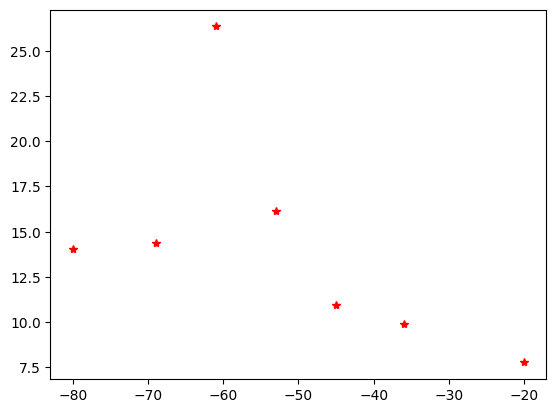

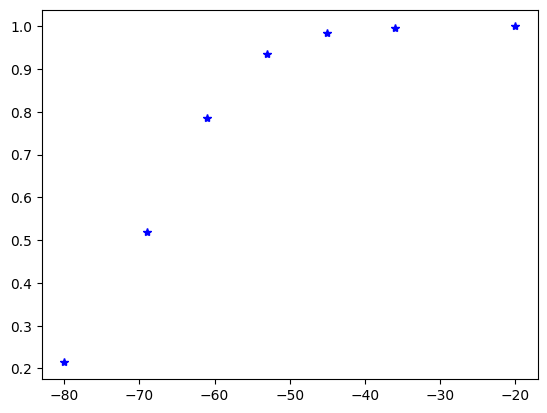

In [77]:
# равновестный потенциал
E_K=-71 
# максимальная проводимость при температуре 23 градуса С
gmax=117 # nS
g=gmax
# значения потенциалов (тестовых)
V_K_Low_exp=np.array([-80,-69, -61, -53, -45, -36, -20])
# максимальные значения токов
I_K_low_exp=np.array([I_80_max ,np.max(I_69), np.max(I_61), np.max(I_53), np.max(I_45), I_36_max, I_20_max])

T=36
T0=23
#V12=-74 # соответсвие max tau
V12=-74+(T-T0)*0.8 #V12=-67 #(-88 – -62)

# вероятность в соответсвии с гипотезой 2х ворот
m_K_Low_exp=np.sqrt(np.abs(1/(1+np.exp((V12-V_K_Low_exp)/s))))
print('m_K_Low_exp=',m_K_Low_exp)
## Для контроля данных
#V_lit=np.arange(-140, 0,1)
#plt.plot(V_I_fin, m_exp, '*')
#plt.plot(V_lit, m_lit, 'r')

# меньшая постоянная времени
tau_K_Low_exp=np.array([14.0590281, 14.3938288, 26.3377299, 16.11779519, 10.96745138 ,9.9026012,  7.77559511])

plt.figure(1)
plt.plot(V_K_Low_exp, tau_K_Low_exp, 'r*')
plt.figure(2)
plt.plot(V_K_Low_exp, m_K_Low_exp, 'b*')

Получиены m_K_Low_exp и tau_K_Low_exp

по ним инициализируется модель на основе кинетических схем (графов)